**Machine Learning Project**

**Project Name : California Housing Value Prediction**

**Project By : Krutika Dhanke**

**Guided By : Sameer Warsolkar Sir**

# ***California Housing Value Prediction***

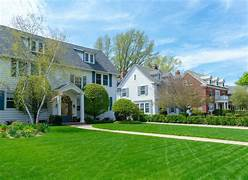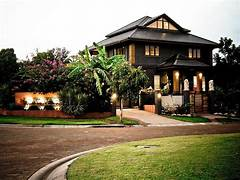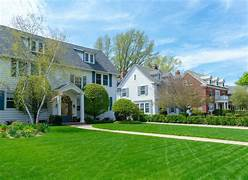


**About Project :**

Welcome to the california House Value Prediction Project!
In this project, we embark on a fascinating exploration of machine learning techniques to predict house values in california.This dataset have attributes like median house value, income, population and more.we're going to build a predictive models that can offer valuable insights into housing trends and provide estimation for property values.

Through the application of regression algorithms,feature engineering, and model evaluation, we are going to unravel the complex relationships between various features and house prices.This projects ultimate goal is to create a reliable predictive model that accuratively estimates house values, aiding stakeholders in making informed decisions within dynamic real istate landscape.

This data set have columns like:

1.MedInc(Median Income): Reflects the median income of households in a district.

2.HouseAge(House Age): Indicates the average age of houses in a district.

3.AveRooms(Average Rooms): Represents the average number of rooms in houses within a district.

4.AveBedrms(Average Bedrooms) : Signifies the average number of bedrooms in houses.

5.Population : The total population count

6.AveOccup(Average Occupancy) : Represents the average occupancy per household. 

7.Latitude and Longitude : Geographic coordinates providing the location of each district

8.MedHouseVal : The target variable, reflecting the median house value for houses within a district.

These attributes offer a diverse range of factors that potentially contribute to determining housing prices.Exploring and analyzing these features can help uncover relationships, patterns, and influential factors affecting housing values across different districts in california.

**Steps**

Importing Libraries

Data Collection

Data Preprocessing

Data Visualization

Splitting Dataset

Standard Scaler

Model Training and Model Evaluation

Prediction

Conclusion

### **Importing required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

### **Fetching the dataset**

In [2]:
from sklearn.datasets import fetch_california_housing
housing_data = fetch_california_housing()

In [3]:
print(housing_data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
#now we're going to convert this this data into pandas dataset

In [5]:
df = pd.DataFrame(housing_data.data)
df.columns = housing_data.feature_names
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
# Now we're adding target variable in a dataset

In [7]:
df['MedHouseVal'] = housing_data.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
#Now I'm going to perform some exploratory data analysis on the dataset

In [9]:
#using this function I'm getting information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [10]:
#now we're going to see shape of the dataset
df.shape

(20640, 9)

This dataset contains 20640 rows and 9 columns

In [11]:
#here we can see the null values in the dataset by looking at the info() but if we want to check null values exclusively then we can use isnull() function.
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [12]:
#I'm using describe() to see stats of the dataset
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


#### **Data Visualization**

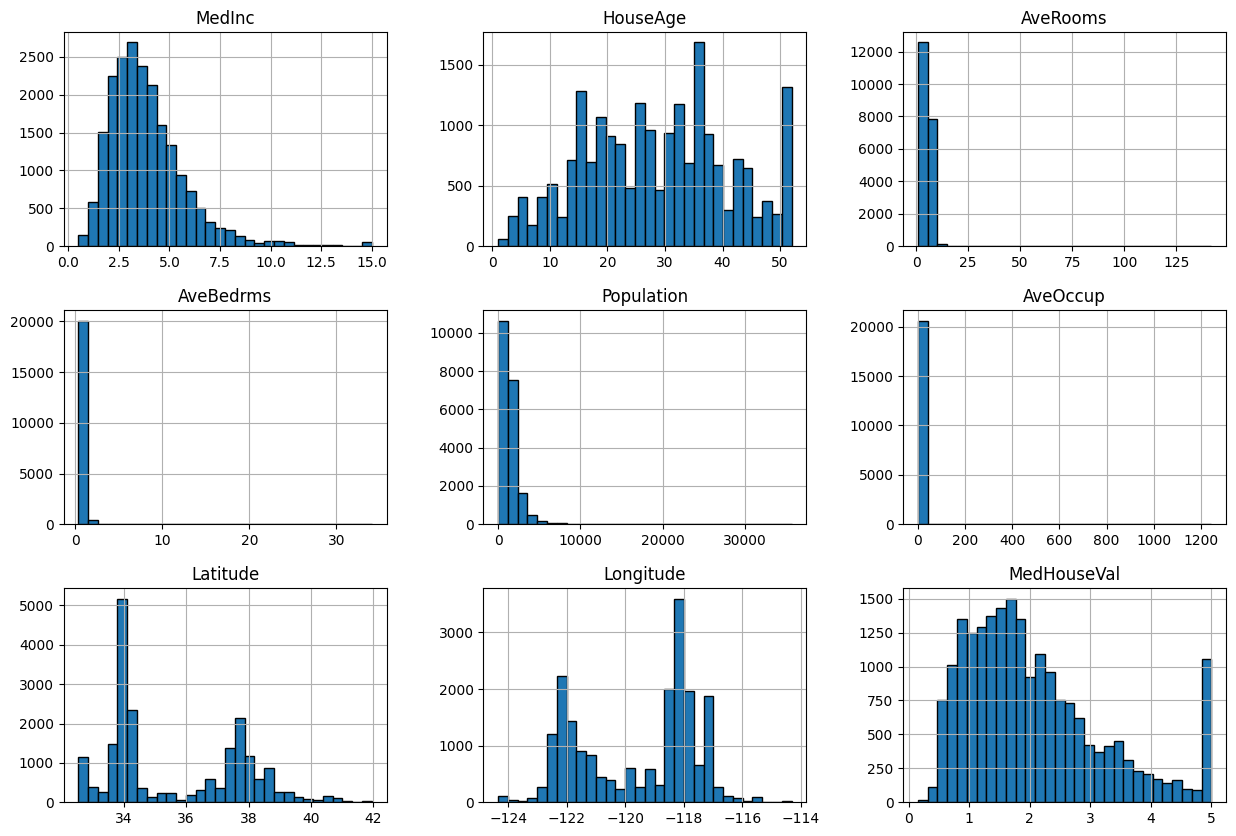

In [13]:
#Now i'm plotting histogram to see distributtion of the data
df.hist(figsize=(15,10), bins = 30, edgecolor='black')
plt.show()

Since I have a geographical data of a houses I'm creating a scatterplot to see the location of the houses has some affect on the median housing value.

Text(0.5, 1.0, 'Median housing value depending on \n their location')

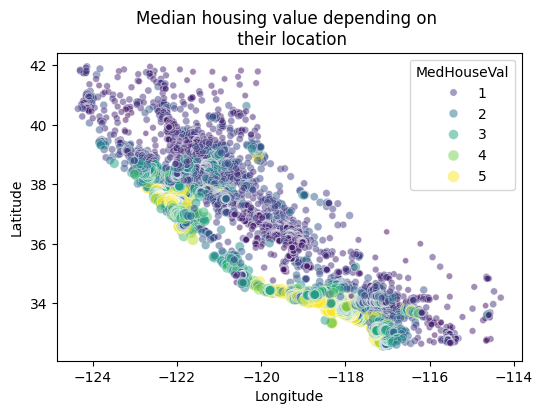

In [14]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="Longitude", y ="Latitude", hue="MedHouseVal", size="MedHouseVal",palette="viridis", alpha =0.5)
plt.legend(title="MedHouseVal",loc="upper right")
plt.title("Median housing value depending on \n their location")

As we can see here the location of the house has some affect on the median housing values but this alone is not enough so now I'm creating correlation metrics.



In [15]:
# Now to find the correlation between data I'm using df.corr()
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


This will give the correlation between the different attributes but it would be easier to visualize a data so now I'm going to plot heatmap of correlated data.


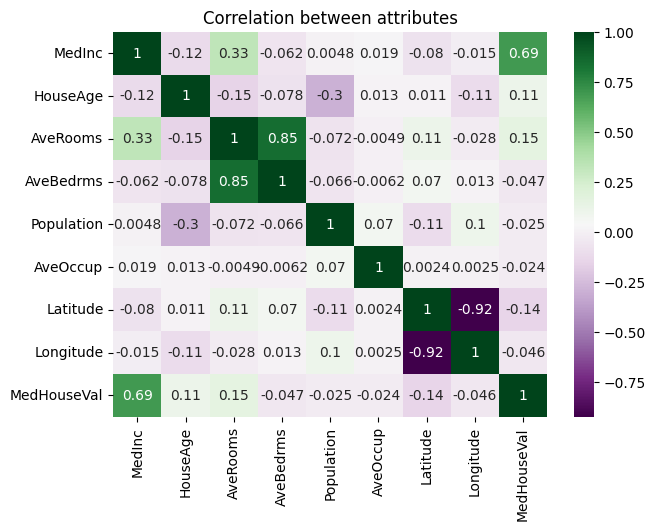

In [16]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), cmap="PRGn", annot=True)
plt.title("Correlation between attributes")
plt.show()

Now, I'm seeing from the above heatmap that MedInc, HouseAge, AveRooms has high correlation with the MedHouseVal aand this is confusing. so, we can also print out values of correlation in asccending order to do that I'm doing next step.



In [17]:
df.corr()['MedHouseVal'].sort_values()

Latitude      -0.144160
AveBedrms     -0.046701
Longitude     -0.045967
Population    -0.024650
AveOccup      -0.023737
HouseAge       0.105623
AveRooms       0.151948
MedInc         0.688075
MedHouseVal    1.000000
Name: MedHouseVal, dtype: float64

now I'm creating scatter plot to see most correlated attributes



<Axes: xlabel='MedInc', ylabel='MedHouseVal'>

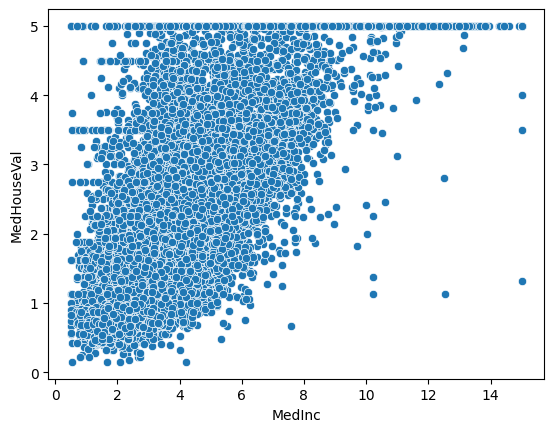

In [18]:
sns.scatterplot(x=df['MedInc'], y =df['MedHouseVal'])

<Axes: xlabel='AveRooms', ylabel='MedHouseVal'>

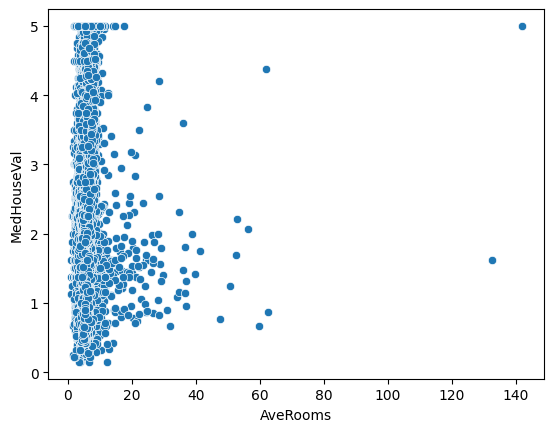

In [19]:
sns.scatterplot(x=df['AveRooms'], y =df['MedHouseVal'])

#### **Splitting dataset into training and test sets**

Now that I have done some data exploration now I'm preparing data to building a model and I'm splitting the data into x and y.

So, for x i'll have to drop MedHouseVal so i'm using drop function and i'm putting the target column in y data.


In [20]:
x = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [22]:
#Now I'm printing the size of training and testing sets
print("x_train:", x_train.shape)
print("x_test:", x_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

x_train: (14448, 8)
x_test: (6192, 8)
y_train: (14448,)
y_test: (6192,)


#### **Standard Scaler Method**

now there is one more step to do before creating a model that is to sanitize the data and i'm using feature scaling to normalize all the independent variables of features on the data. so that any one variable will not dominating the model.

So, Here I'm using Standard Scaler to transform the data


In [23]:
scaler = StandardScaler()
x_train =scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#### **Model Training and Model Evaluation**

Now, that the data is transform and ready I'm going to proceed to build an model.

First, I'm going to train a data on LinearRegressionModel

### **Linear Regression Model**

Linear Regression is a fundamental supervised learning algorithm used for regression tasks. It establishes a linear relationship between input features and the continuous target variable. The model assumes a linear relationship, seeking to find thr best fitting linear equation that describes the relationship between the independent variables(features) and the dependent variable(target).
Linear Regression is widely used due to its simplicity, speed, and interpretability.It serves as a benchmark model for regression tasks and can be a good starting point for understanding relationships between variables in your data.

In [24]:
lm = LinearRegression()
lm.fit(x_train, y_train) #fitting the x_train and y_train on linear regression model
lm_pred = lm.predict(x_test) #predicting value for given x_test data

Evaluate the Linear Regression Model Performance to do that i'm going to calculate mean_squared_error, mean_absolute_error, r2_score

In [25]:
lm_mae = mean_absolute_error(y_test,lm_pred)
lm_mse = mean_squared_error(y_test,lm_pred)
lm_r2 = r2_score(y_test,lm_pred)
print("MAE of the linear regression model:", lm_mae)
print("MSE of the linear regression model:", lm_mse)
print("R2 score of the linear regression model:", lm_r2)

MAE of the linear regression model: 0.5272474538305952
MSE of the linear regression model: 0.5305677824766752
R2 score of the linear regression model: 0.5957702326061665


Now, I'm going to train a data on Decision Tree Model

### **Decision Tree Model**

A Decision Tree Regressor is a machine learning algorithm used for regression tasks. It works by recursively partitioning the data into subsets based on the most significant feature at each node of the tree. Each split aims to minimize the variance of the target variable within the subsets.
Decision Tree Regressor are interpretable, easy to visualize, and serve as fundamental building blocks for more complex models like Random Forests or Gradient Boosting. They are suitable for smaller datasets and offer a clear understanding of how predictions are made based on the input features.

Similar to linear regression model I'm going to fisrt loading the model then fittin the data and tyhen i'm predicting the value for given data



In [26]:
Dtree = DecisionTreeRegressor()
Dtree.fit(x_train, y_train) #fitting the x_train and y_train on linear regression model
Dtree_pred = Dtree.predict(x_test) #predicting value for given x_test data

Evaluate the model

In [27]:
lm_mae = mean_absolute_error(y_test,lm_pred)
lm_mse = mean_squared_error(y_test,lm_pred)
lm_r2 = r2_score(y_test,lm_pred)
print("MAE of the linear regression model:", lm_mae)
print("MSE of the linear regression model:", lm_mse)
print("R2 score of the linear regression model:", lm_r2)

MAE of the linear regression model: 0.5272474538305952
MSE of the linear regression model: 0.5305677824766752
R2 score of the linear regression model: 0.5957702326061665


Training the data on Random Forest Model

### **Random Forest Model**

Random Forest is an ensemble learning method that operates by constructing multiple decision trees during training and outputs the mean prediction of the individual trees for regression tasks or the mode for classification tasks.
Random forest is a popular choice in machine learning due to its simplicity, robustness, and effectiveness in various types of data and tasks, including regression and classification problems.

In [28]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train) 
rf_pred = rf.predict(x_test) 

In [29]:
rf_mae = mean_absolute_error(y_test,rf_pred)
rf_mse = mean_squared_error(y_test,rf_pred)
rf_r2 = r2_score(y_test,rf_pred)*100
print("MAE of the random forest model:", rf_mae)
print("MSE of the random forest model:", rf_mse)
print("R2 score of the random forest model:", rf_r2)

MAE of the random forest model: 0.3313038291343671
MSE of the random forest model: 0.2556924618032365
R2 score of the random forest model: 80.519264875714


Now I'm going to create a new dataframe to check and predict median house values 

**Prediction Using Best Performing Model**

In [30]:
data = {'MedInc':5.567, 'HouseAge':4.234, 'AveRooms':1.0956, 'AveBedrms':3.56, 'Population':270, 'AveOccup':3.30,
       'Latitude':56.32, 'Longitude':-122.56}
index = [0]
new = pd.DataFrame(data, index)
new

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,5.567,4.234,1.0956,3.56,270,3.3,56.32,-122.56


In [31]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

Now that i have new data I'm going to predicts its median housing value and here I'm using the random forest model as this model is giving the best model performance



In [32]:
val_pred = rf.predict(new)
print("The median housing value for new data:", val_pred)

The median housing value for new data: [3.8026242]


#### **Conclusion**

So here we apply LinearRegression model Decision Tree Regressor and Random Forest Regressor one by one on our data, we can conclude that we get better accuracy in Random Forest model which is  80.57%  as compare to other two models so it is best to use Random Forest Regressor instead of Decision Tree Regressor and Linear regression Model.
Thus the machine learning model to predict the California housing value based on given dataset is executed successfully using Random Forest Regressor, Decision Tree Regressor and Linear regression algorithm.This model further helps people understand whether this place is more suited for them based on heatmap correlation. It also helps people looking to sell a house at best time for greater profit. Any house price in any location can be predicted with minimum error by giving appropriate dataset.